# Homework 1
---
**Summer 2025 - Intructor: Joyce Yang**

**Adapted from teaching materials by Prof. Chris Volinksy Fall 2024.**




**REMEMBER TO SAVE THIS NOTEBOOK TO YOUR OWN GOOGLE DRIVE!**

**Please submit homework to Brightspace**

**Make Sure**:
- You answered all questions with text conclusion.
  - For example, you typed the answer "There is no missing value" in text cell based on your observation when asked "Is there any missing values in the dataframe". Only shows `print(dataframe.summary())` will not be a complete answer.
  - For example, you typed your comments or interpretation based on your results in text cell when asked.
- The file can be rerun without error from top to bottom.
- All output is visible as part of the `.ipynb` file. You may lose points if output are missing.


# Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted, based on data from their application.

To facilitate building a model, we have collected historical data on a number of students, and asked an expert (who has been part of the admissions process) to assess the Chance of Admission.  This is the target for our model.   

We have the following data

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5)
7. Undergraduate GPA (out of 10)
8. Research Experience (either 0 or 1)
9. Chance of Admission (probability ranging from 0 to 1) [ target variable ]


Since future student applications will contain these features, a model predicting Chance of Admission from the features could be helpful in early processing of the applications.  


## Download and import the data


[Clicking here should download the data to your machine](https://drive.google.com/uc?export=download&id=1qegVDL95gjRy1P3rz7Ue43AzZG7SA1Mm) as a file called HudsonU.csv.  Place this file on your local machine for upload in the next section..

**Load the HudsonU data into a pandas data frame and import the key Python packages.**

In [2]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

**0. Import the HudsonU data and called it 'admissions'**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving HudsonU.csv to HudsonU.csv


In [4]:
admissions_df = pd.read_csv("HudsonU.csv",index_col=0)

**1. Is this a supervised or unsupervised problem?  Is it classification or regression?**

supervised learning, classification

**2. How many rows and columns are in the data?  Calculate whether any of the features have missing data.**

In [6]:
print("Shape of the dataset:", admissions_df.shape)
missing_values = admissions_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Shape of the dataset: (500, 8)
Missing values per column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


**3. Rename the columns in the dataframe to remove any blank spaces and symbols in the column (feature) names, to make them easier to refer to. This will make your life easier.  Show descriptive statistics for the newly-named columns using `describe()`.**

In [10]:
admissions_df.columns = admissions_df.columns.str.strip().str.replace('[^A-Za-z0-9_]', '_', regex=True)
print(admissions_df.describe())

        GRE_Score  TOEFL_Score  University_Rating         SOP        LOR  \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance_of_Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    

**4. Explore the distribution of Chance of Admission. Plot a histogram of
this feature. Create a new histogram with 15 bins, make the bins purple, and add black outlines around the bars.  Make sure the histogram axes are labelled.   Also, draw a red vertical dashed line on the histogram to show the median value.  Finally add a sentence or two about what you learn from the histogram about the distribution of Chance of Admission.**

*Hint*: Use `plt.hist` with arguments.

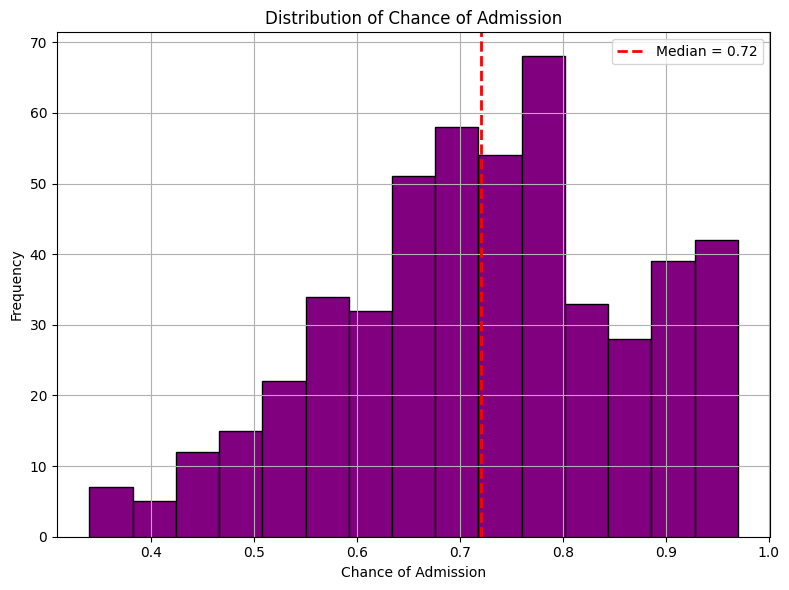

In [11]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(admissions_df['Chance_of_Admit'], bins=15, color='purple', edgecolor='black')

# Add median line
median_val = admissions_df['Chance_of_Admit'].median()
plt.axvline(median_val, color='red', linestyle='dashed', linewidth=2, label=f'Median = {median_val:.2f}')

# Label axes and add title
plt.xlabel('Chance of Admission')
plt.ylabel('Frequency')
plt.title('Distribution of Chance of Admission')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**5. How much of Chance of Admission depends on their research experience? Find the average Chance of Admission for the different levels of Research. Interpret the results with a sentence or two.**

*Hint*: You can find the average Chance of Admission for the different levels of Research with `groupby` function in pandas.


In [12]:
avg_chance_by_research = admissions_df.groupby('Research')['Chance_of_Admit'].mean()
print(avg_chance_by_research)

Research
0    0.634909
1    0.789964
Name: Chance_of_Admit, dtype: float64


**6. Does the distribution of Chance of Admission  change with the rating of the university the person comes from?  Plot a histogram of Chance of Admission for each university rating. Plot 5 histograms - with a vertical line at the median for each histogram. Plot all histograms with the same range on the X-axis to aid in comparisons. Comment and interpret what you learn from the plots.**

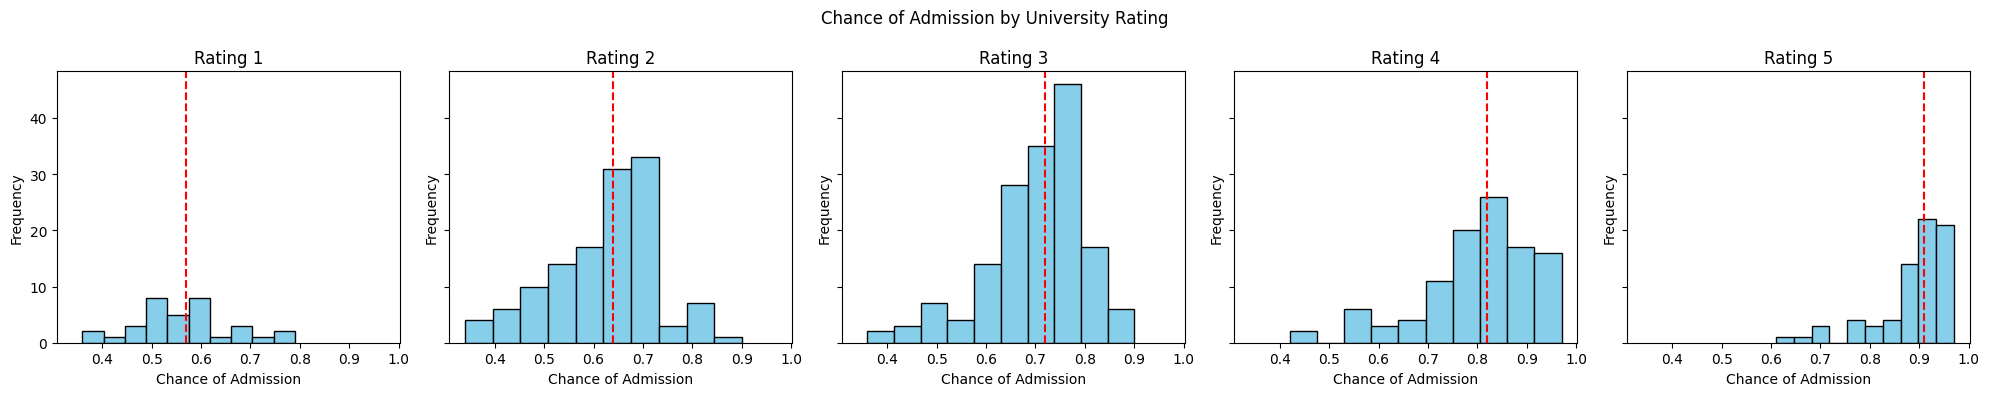

In [16]:
ratings = sorted(admissions_df['University_Rating'].unique())
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)


for i, rating in enumerate(ratings):
    subset = admissions_df[admissions_df['University_Rating'] == rating]
    axs[i].hist(subset['Chance_of_Admit'], bins=10, color='skyblue', edgecolor='black')
    axs[i].axvline(subset['Chance_of_Admit'].median(), color='red', linestyle='dashed')
    axs[i].set_title(f'Rating {rating}')
    axs[i].set_xlabel('Chance of Admission')
    axs[i].set_ylabel('Frequency')

plt.suptitle('Chance of Admission by University Rating')
plt.tight_layout()
plt.show()

**7. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and Chance of Admission.  Use an `alpha` value *less than* 0.5 in order to see where there is overplotting.   Make sure to label the axes. Comment:  How would you describe this relationship?**

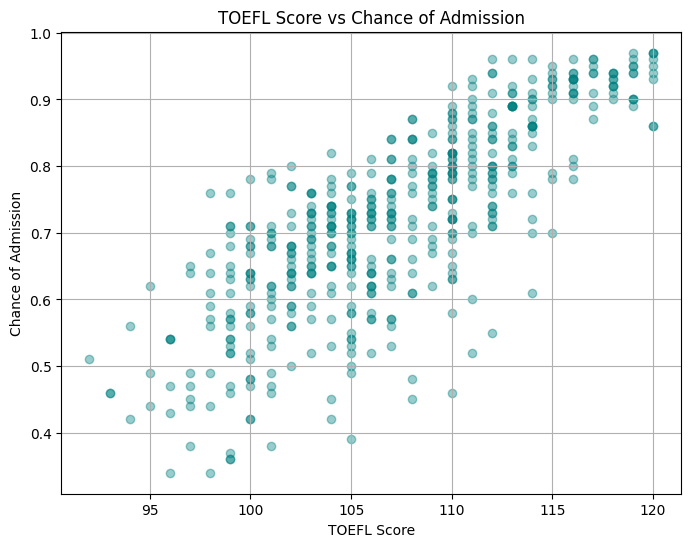

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(admissions_df['TOEFL_Score'], admissions_df['Chance_of_Admit'], alpha=0.4, color='teal')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admission')
plt.title('TOEFL Score vs Chance of Admission')
plt.grid(True)
plt.show()

**8. Boxplots are useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of Admission grouped by "University Rating". Comment on any relationship you see.**

*Hint*: You can use `seaborn` library.

/tmp/ipython-input-21-899087019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='University_Rating', y='Chance_of_Admit', data=admissions_df, palette='coolwarm')


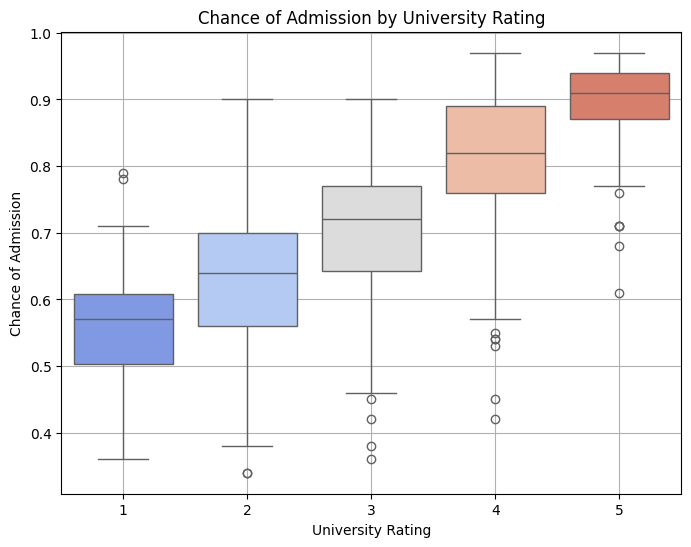

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='University_Rating', y='Chance_of_Admit', data=admissions_df, palette='coolwarm')
plt.title('Chance of Admission by University Rating')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.grid(True)
plt.show()

**9. The boxplots above show some potential outliers.  In particular the box for 'University Rating' = 5 has some cases with lower Chance of Admission than the other applications with Rating = 5. Can you identify which case has the lowest Chance of admission but comes from a university with Rating = 5? Report the serial number of the case.**


In [23]:
lowest_case = admissions_df[admissions_df['University_Rating'] == 5].sort_values('Chance_of_Admit').head(1)
print("Outlier record:\n", lowest_case)

Outlier record:
             GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  \
Serial No.                                                              
111               305          108                  5  3.0  3.0  8.48   

            Research  Chance_of_Admit  
Serial No.                             
111                0             0.61  


**10. Drop `Serial Number` column. It is not useful for the following summarization and modelling tasks.**

In [25]:
admissions_df = admissions_df.drop(columns=['SOP'])

**11. Very often it is useful to quantify the correlation (or linear relationship)  between different features. Display the correlations between all pairs of features using a seaborn heatmap. Round values to two decimal places.**

*Hint*: use appropriate color palette and max/min values. You can refer to `lab 3.ipynb` Module.

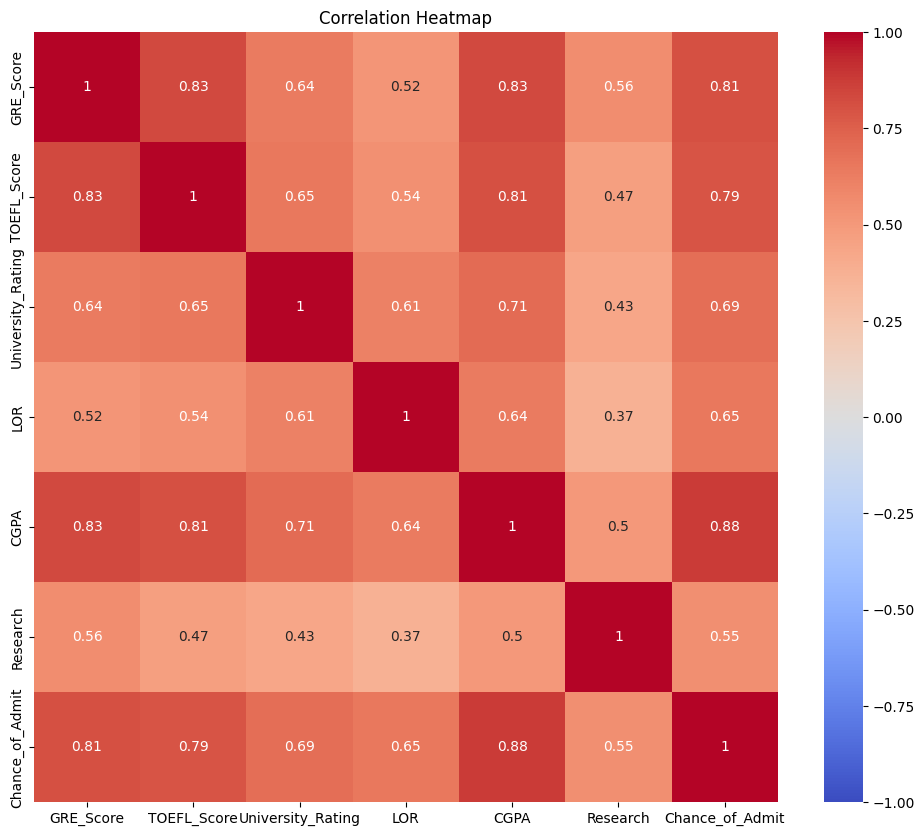

In [26]:
plt.figure(figsize=(12, 10))
corr_matrix = admissions_df.corr().round(2)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**12. Based on the heatmap from the previous plot, which pair of features have the highest correlation?  Which feature has the highest correlation with our target?**

CGPA to chance of admissions

**13. Build a linear regression model to predict the Chance of Admission using the available features. Use an 80/20 training/test split.  Generate predictions and plot a scatterplot of the predicted values against the actual values using the test set.  Report the Root Mean Squared Error (RMSE) for your predictions and round it to 4 decimals and comment with an interpretion of the RMSE (e.g. what does RMSE = 0.1 mean?)**

*Hint*: Use `LinearRegression` from `sklearn.linear_model`

RMSE: 0.0609


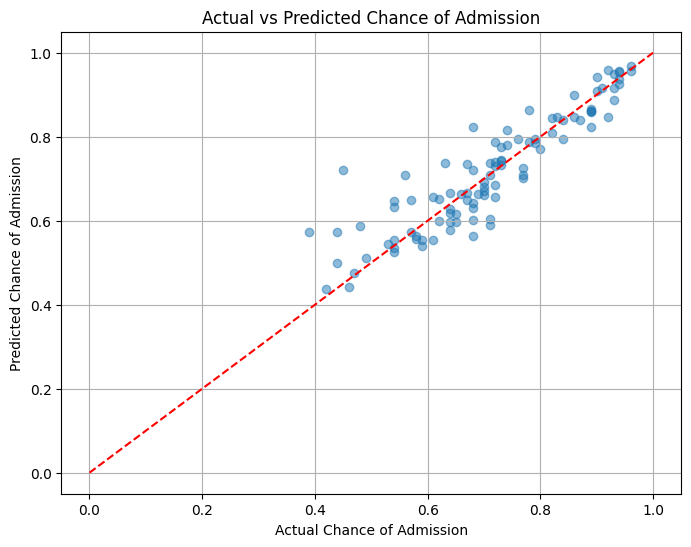

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define X and y
X = admissions_df.drop(columns='Chance_of_Admit')
y = admissions_df['Chance_of_Admit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # y = x line
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs Predicted Chance of Admission')
plt.grid(True)
plt.show()

**14. Describe how the admissions team might take action to use the results of this model to aid in the admissions process.  Specifically what actions could they take, and what might the impact be of an effective model.  Also, discuss any ethical concerns you may see with using this data for this purpose.**

Use the model to flag strong candidates based on features like GPA, GRE, TOEFL, and research.
Though might disadvantage lower income ppl and minority communities

# Congrats! You finished it!
**Please submit homework to Brightspace**

**Make Sure**:
- You answered all questions with text conclusion.
  - For example, you typed the answer "There is no missing value" in text cell based on your observation when asked "Is there any missing values in the dataframe". Only shows `print(dataframe.summary())` will not be a complete answer.
  - For example, you typed your comments or interpretation based on your results in text cell when asked.
- The file can be rerun without error from top to bottom.
- All output is visible as part of the `.ipynb` file. You may lose points if output are missing.
